# FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
#Mounting the contents of my drive folder:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading the data from the csv location:
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
# return the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

Before making out interpretations, we must to remember the dataset structure as (x,y) = (rows, columns) where x are the data registers and y are the variables.

In [4]:
# We can see about rows and columns of this dataset by looking its information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


We can see from this that we have, 1898 rows (registers) and 9 columns (variables)

In [5]:
#Another alternative way to see the number of rows and columns of this dataset could be by looking its shape

df.shape

(1898, 9)

Confirming our last output!

#### Observations: Our dataset has 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [6]:
# We can see about datatypes of our rows and columns of this dataset by looking its information
df.info()

# Use info() to print a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: We can see datatypes like:

1.  **int** for *order_id, customer_id, food_preparation_time* and *delivery_time*
2.  **object** for *restaurant_name, cuisine_type, day_of_the_week* and *rating*
3.  **float** for *cost_of_the_order*


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [7]:
# We can see the null values in our dataset by executing the isnull.sum() command to identify and count NaNs in our df dataframe.

# In this case, isnull() returns a dataframe of the same shape as dataframe 'df' but with Boolean values: True for NaNs and False for non-NaNs. After this, sum() makes the 'True' values as 1 and 'False' as 0, and sums up values along the column-wise axis.
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are not missing values in our dataset.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [8]:
# To check the statistical summary of the data, which will show only numerical columns and their specific statistical information, so we can use:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations: From this, we can see the columns order_id, customer_id, cost_of_the_order, food_preparation_time and delivery_time which are numerical

#### We can see the minimum value for the variable 'food_preparation_time', in this case the minimum is min = 20 s, the average (mean) is mean = 27.371970, approximately to 27.37 s, the maximum is max = 35 s.

### The IQR for each variable, then should be:

In [9]:
# Now, we can inspect numerical variables only and use them to find the Interquantile range

numerical_df = df.select_dtypes(include=['number'])

# Calculate Quantile 1 Q1 (25th percentile)
Q1 = numerical_df.quantile(0.25)

# Calculate Qunatile 3 Q3 (75th percentile)
Q3 = numerical_df.quantile(0.75)

# Calculate IQR (difference between Q3 and Q1)
IQR = Q3 - Q1

print("Interquartile Range (IQR) for numerical columns:")
print(IQR)

Interquartile Range (IQR) for numerical columns:
order_id                    948.5000
customer_id              192737.2500
cost_of_the_order            10.2175
food_preparation_time         8.0000
delivery_time                 8.0000
dtype: float64


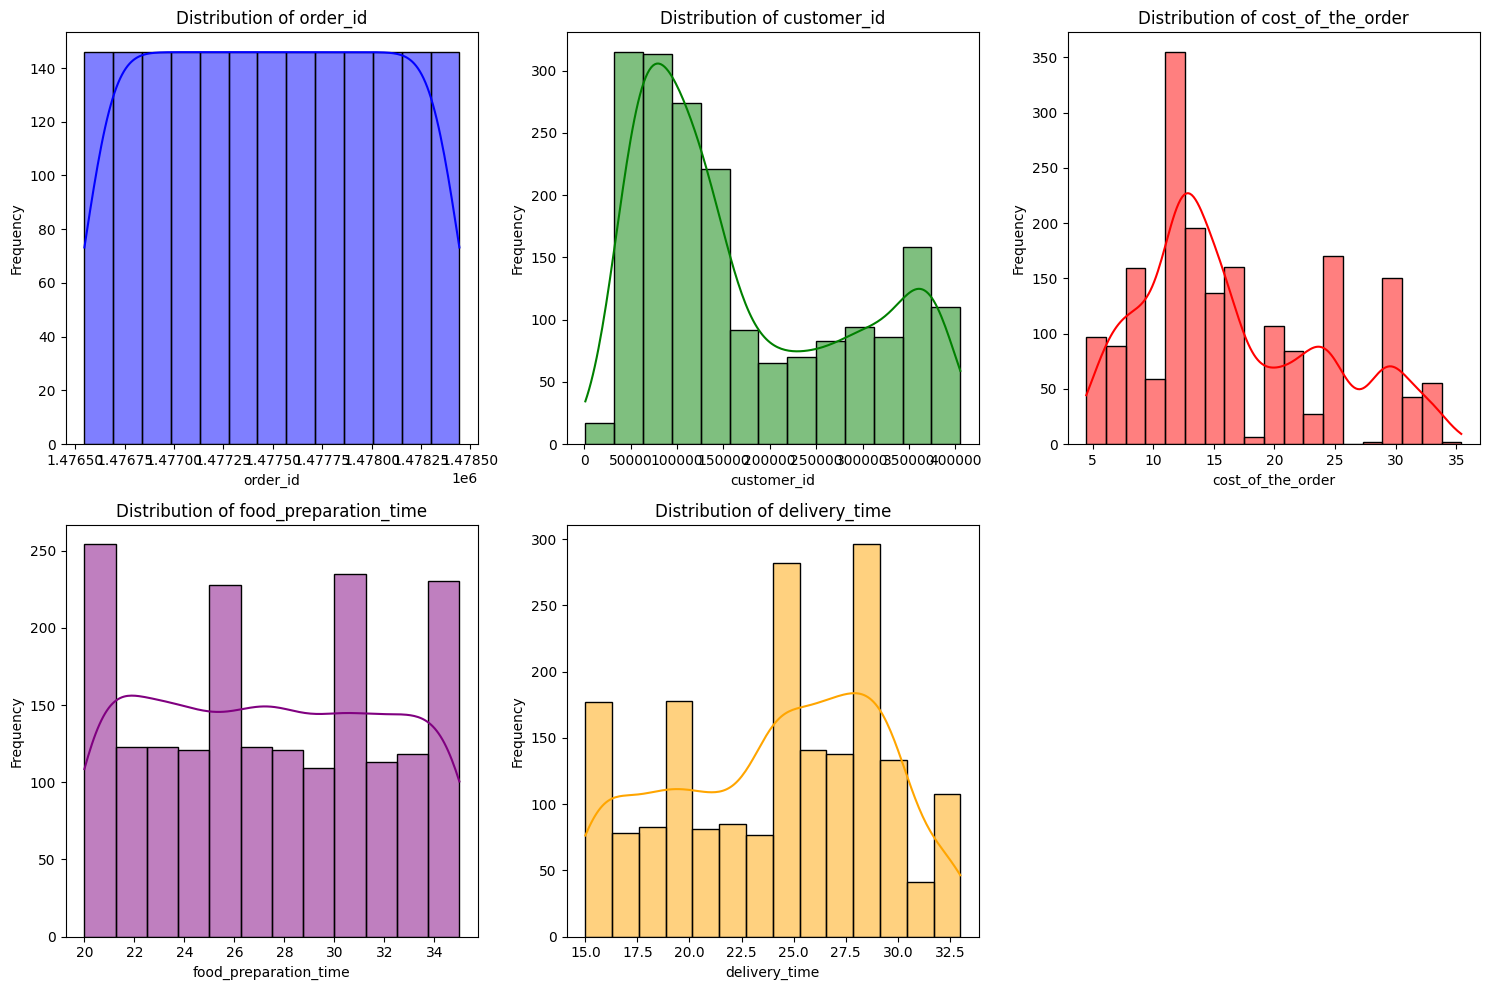

In [10]:
# Now, inspecting with numerical columns only:
numerical_columns = df.select_dtypes(include=['number']).columns

# Define a list of colors
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot a figure with a specific shape
plt.figure(figsize=(15, 10))

# Iterate over the index and pairs of column names and colors, starting the index at 1
for i, (col, color) in enumerate(zip(numerical_columns, colors), 1):

    # Create a subplot in a 2x3 grid at the position specified by the index 'i'
    plt.subplot(2, 3, i)

    # Plot a histogram of the current column with Kernel Density Estimate and specified color (according to the list of colors provided)
    sns.histplot(df[col], kde=True, color=color)

    # Set the title of the current subplot to indicate the column's distribution
    plt.title(f'Distribution of {col}')

    # Label the x-axis with the name of the current column
    plt.xlabel(col)

    # Label the y-axis as 'Frequency'
    plt.ylabel('Frequency')

# Adjust subplot parameters to give some padding and avoid overlap
plt.tight_layout()

# Display the figure with all the subplots
plt.show()


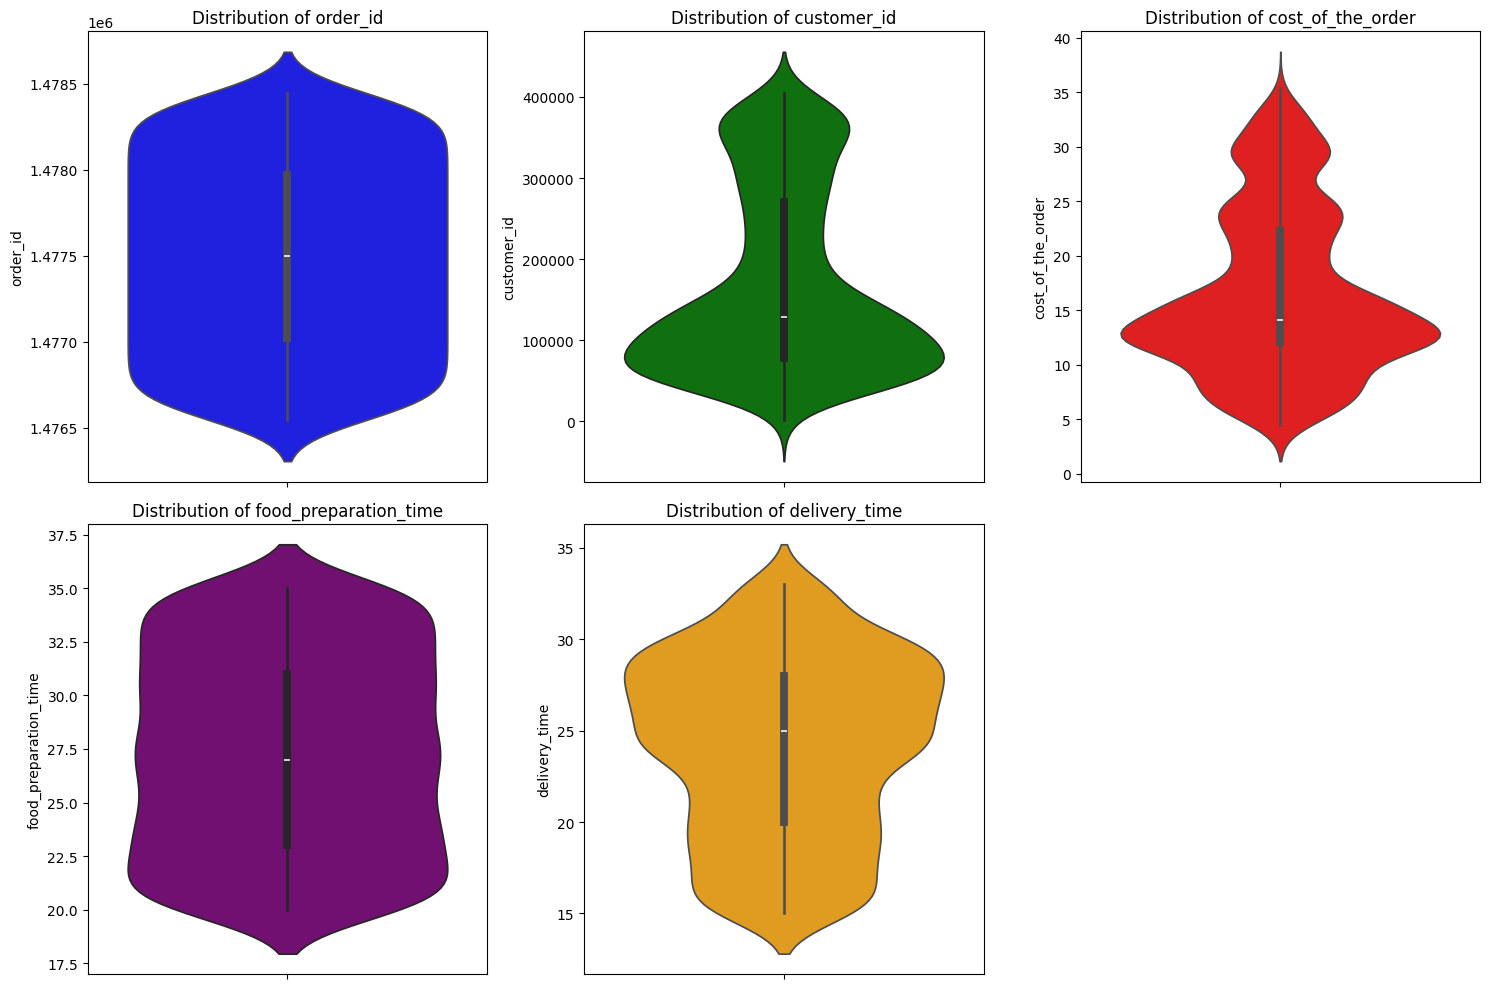

In [11]:
# Set up the figure size for the plot
plt.figure(figsize=(15, 10))

# Iterate over the index and pairs of column names and colors, starting the index at 1
for i, (col, color) in enumerate(zip(numerical_columns, colors), 1):
    # Create a subplot in a 2x3 grid at the position specified by the index 'i'
    plt.subplot(2, 3, i)

    # Plot a violin plot of the current column with the specified color
    sns.violinplot(y=df[col], color=color)

    # Set the title of the current subplot to indicate the column's distribution
    plt.title(f'Distribution of {col}')

    # Set the x-axis label to an empty string (There's no label for a violin plot)
    plt.xlabel('')

    # Label the y-axis with the name of the current column
    plt.ylabel(col)

# Adjust subplot parameters to give some padding and avoid overlap
plt.tight_layout()

# Display the figure with all the subplots
plt.show()


### **Question 5:** How many orders are not rated?

In [12]:
# We need to inspect the variable 'rating', so we will use value_counts(), a function which counts the unique values in a column of a dataframe in descending order. Useful for categorical data.
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:

We can see that there are **736 not rated** orders in our dataset.

# Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

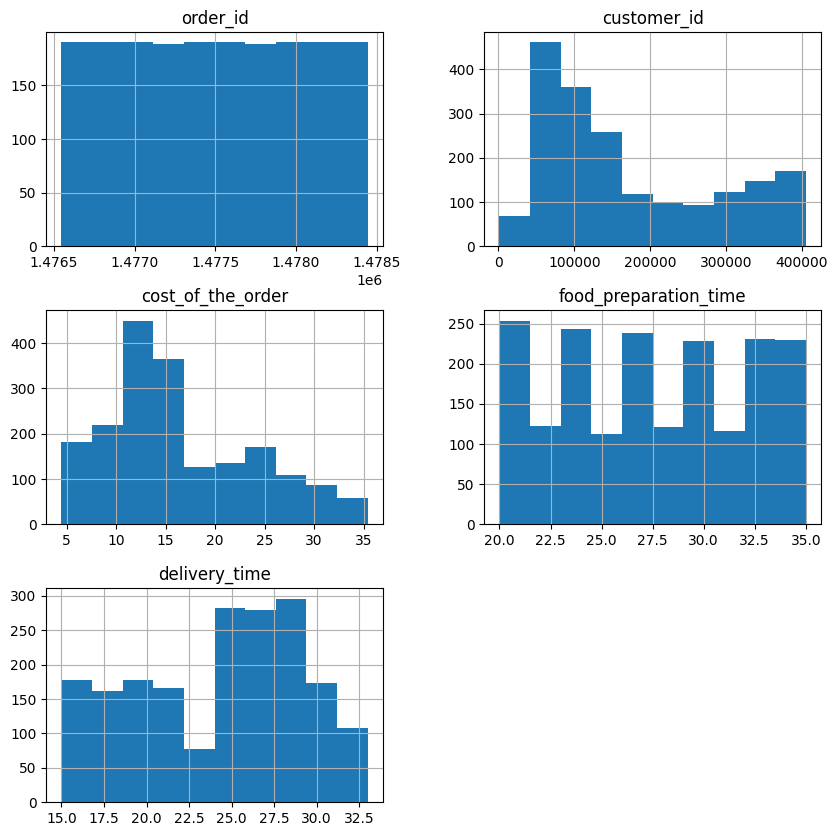

In [13]:
# We will start plotting a basic histogram of every numerical variables in the dataset:
df.hist(figsize=(10,10))
plt.show()

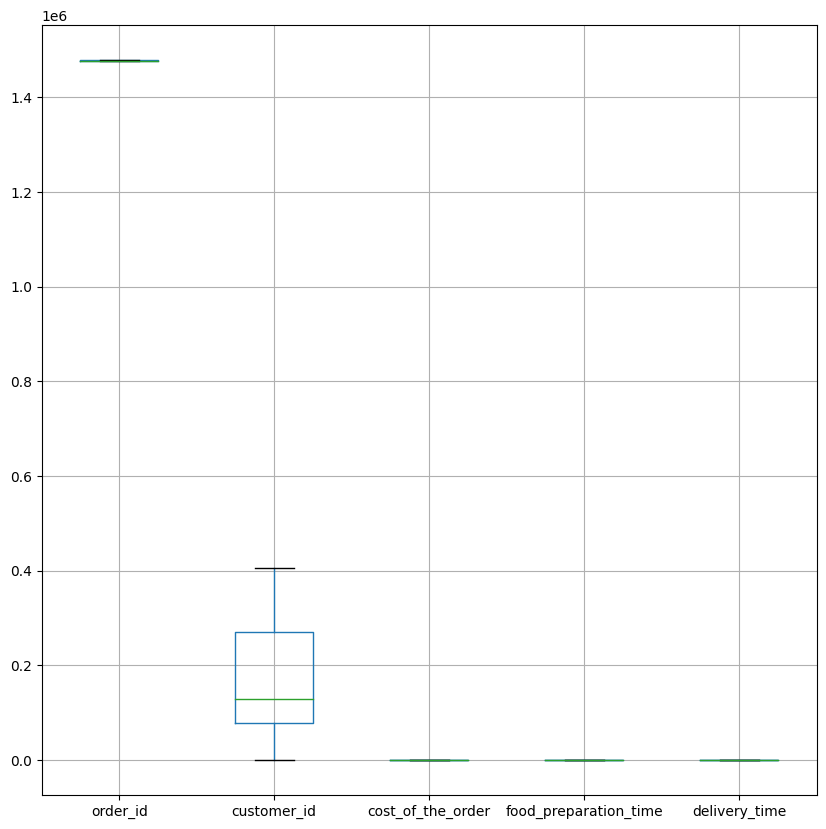

In [14]:
# Then, we proceed by plotting a boxplot for numerical variables
df.boxplot(figsize=(10,10))
plt.show()

Notice that there are some variables for which these plots work well. Others, could not have some kind of sense.

<ipython-input-15-d82ecaa494a1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')
<ipython-input-15-d82ecaa494a1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')
<ipython-input-15-d82ecaa494a1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')
<ipython-input-15-d82ecaa494a1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effe

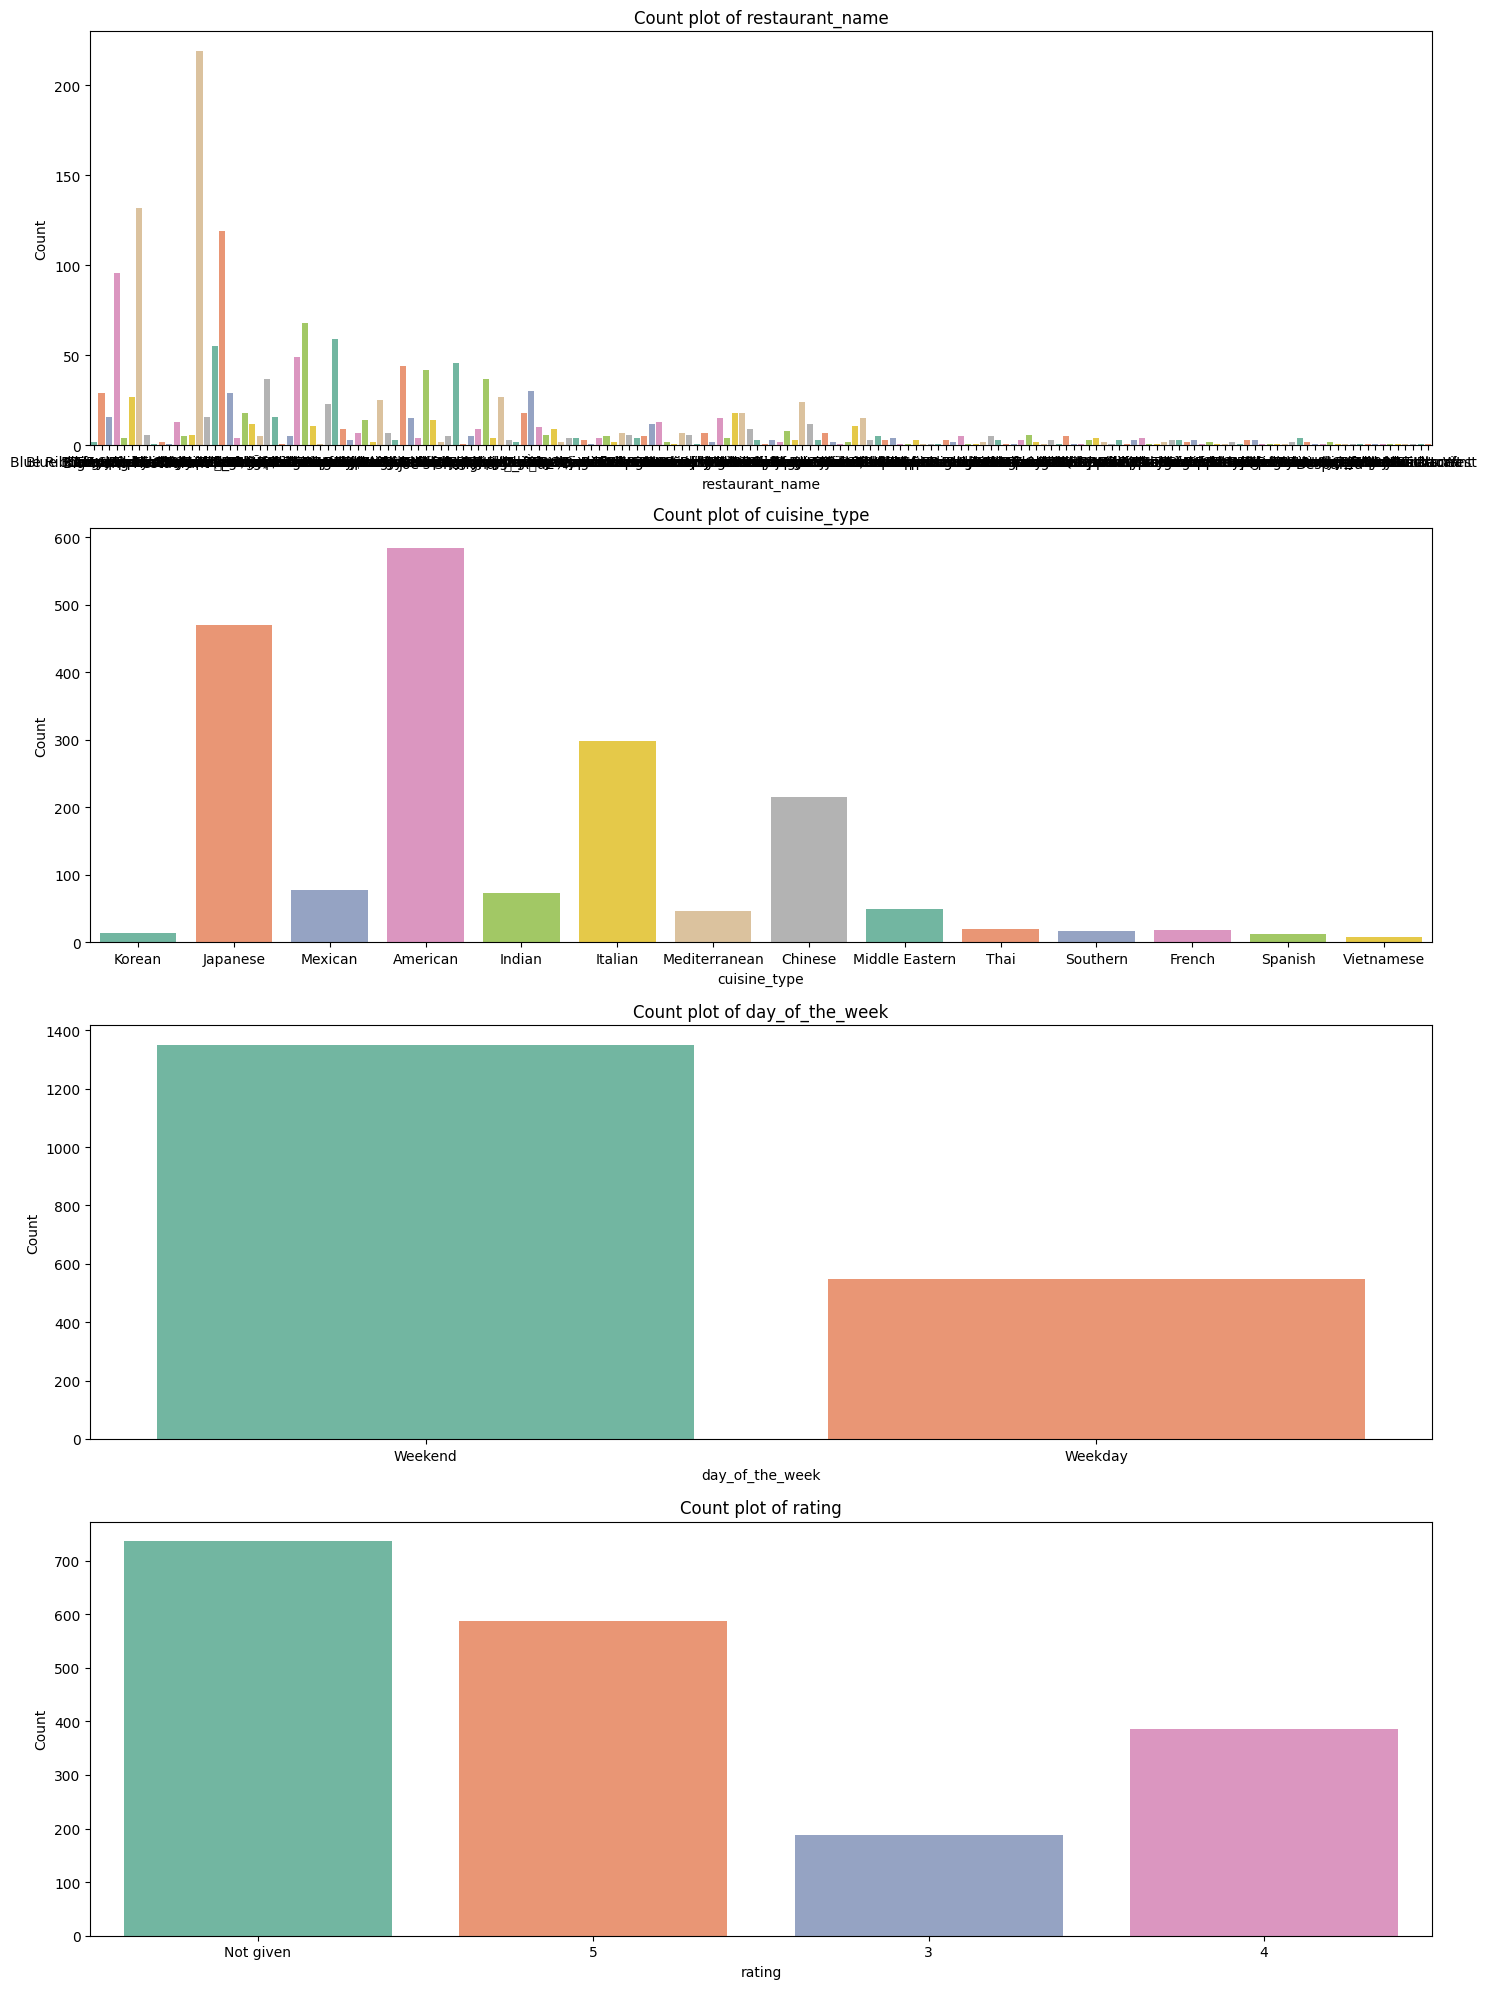

In [15]:
# Select the columns with categorical data types ('object' or 'category') from the DataFrame
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Set up the figure size for the plot; height is scaled based on the number of categorical columns
plt.figure(figsize=(15, 5 * len(categorical_columns)))

# Iterate over the index and column names of the categorical columns, starting the index at 1
for i, col in enumerate(categorical_columns, 1):
    # Create a subplot for each categorical column, arranged in a vertical stack
    plt.subplot(len(categorical_columns), 1, i)

    # Plot a count plot for the current categorical column using the 'Set2' color palette
    sns.countplot(x=df[col], palette='Set2')

    # Set the title of the current subplot to indicate the column's count plot
    plt.title(f'Count plot of {col}')

    # Label the x-axis with the name of the current column
    plt.xlabel(col)

    # Label the y-axis as 'Count'
    plt.ylabel('Count')

# Adjust subplot parameters to give some padding and avoid overlap
plt.tight_layout()

# Display the figure with all the subplots
plt.show()

In [16]:
# Calculate the number of unique values for each column
unique_counts = df.apply(pd.Series.nunique)

# Print the results
print(unique_counts)

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64


In [17]:
# Iterate over columns of the DataFrame and print unique values
for col in df.columns:
    print(f'Column: {col}')
    print(f'Unique Values: {df[col].unique()}')
    print('---')

Column: order_id
Unique Values: [1477147 1477685 1477070 ... 1477819 1477513 1478056]
---
Column: customer_id
Unique Values: [337525 358141  66393 ...  97838 292602 397537]
---
Column: restaurant_name
Unique Values: ['Hangawi' 'Blue Ribbon Sushi Izakaya' 'Cafe Habana'
 'Blue Ribbon Fried Chicken' 'Dirty Bird to Go' 'Tamarind TriBeCa'
 'The Meatball Shop' 'Barbounia' 'Anjappar Chettinad' 'Bukhara Grill'
 'Big Wong Restaurant \x8c_¤¾Ñ¼' 'Empanada Mama (closed)' 'Pylos'
 "Lucky's Famous Burgers" 'Shake Shack' 'Sushi of Gari' 'RedFarm Hudson'
 'Blue Ribbon Sushi' 'Five Guys Burgers and Fries' 'Tortaria'
 'Cafe Mogador' 'Otto Enoteca Pizzeria' 'Vezzo Thin Crust Pizza'
 'Sushi of Gari 46' 'The Kati Roll Company' 'Klong' '5 Napkin Burger'
 'TAO' 'Parm' 'Sushi Samba' 'Haru Gramercy Park'
 'Chipotle Mexican Grill $1.99 Delivery' 'RedFarm Broadway' 'Cafeteria'
 'DuMont Burger' "Sarabeth's East" 'Hill Country Fried Chicken' 'Bistango'
 "Jack's Wife Freda" "Mamoun's Falafel" 'Prosperity Dumpling'


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [18]:
# Now, we can use .value_counts() in the restaurant_name column, adding the .head() at the end in order to print top 5 by default.
df['restaurant_name'].value_counts().head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations: We can see *Shake Shack* restaurant leading the list with 219 counts, then *The Meatball Shop* with 132 counts, third *Blue Ribbon Sushi* with 119 counts, then *Blue Ribbon Fried Chicken* with 96 counts, and finally the *Parm* with 68 counts.


### **Question 8**: Which is the most popular cuisine on weekends?

In [19]:
# In order to get the most popular cuisine on weekends, we filter out the dataframe exclusively with 'day_of_the_weeek' column with only rows 'Weekend' and make a new dataframe called 'df_weekend'
df_weekend = df[df['day_of_the_week'] == 'Weekend']
#Now, we filter the 'df_weekened' dataframe only with the column 'cuisine_type' and use .value_counts() function again, and finishing with printing the .head(1) function with exclusively the top first value.
df_weekend['cuisine_type'].value_counts().head(1)

cuisine_type
American    415
Name: count, dtype: int64

#### Observations: The most popular cuisine on weekends in American, with 415 counts.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [20]:
# We proceed by filtering the DataFrame to get orders that cost above 20 dollars and calculate the count and percentage

# Let's calculate the number of orders with a cost greater than 20 dollars by creating a boolean mask and summing the True values
orders_above_20_count = (df['cost_of_the_order'] > 20).sum()
total_orders_count = df.shape[0]

# Calculate the percentage of orders that cost above 20 dollars by dividing the count of such orders by the total number of orders and multiplying by 100 to get a percentage
percentage_above_20 = (orders_above_20_count / total_orders_count) * 100

#Prints:
print('The number of total orders that cost above 20 dollars is:', orders_above_20_count)
print('Percentage of orders above 20 dollars:', round(percentage_above_20, 2), '%')


The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


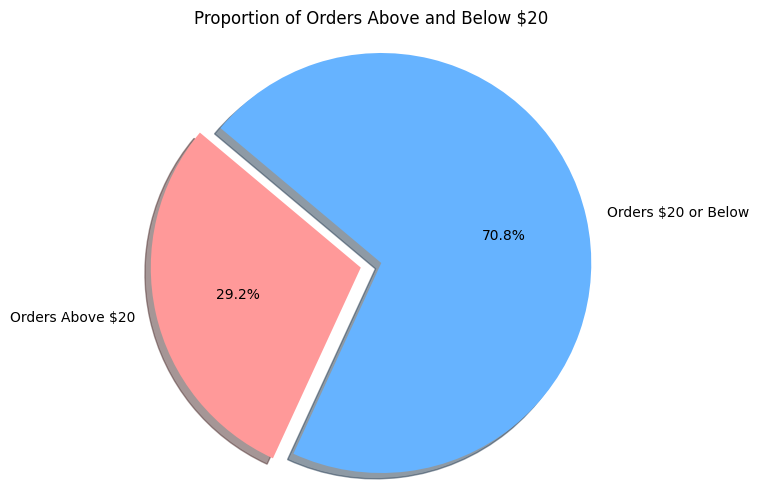

In [21]:
# Now, we can see with a pie plot the proportion of orders above and below $20
# Filtering the DataFrame to get orders that cost above 20 dollars:
df_greater_than_20 = df[df['cost_of_the_order'] > 20]

# Now we calculate the number of total orders where the cost is above 20 dollars
num_orders_above_20 = df_greater_than_20.shape[0]
print('The number of total orders that cost above 20 dollars is:', num_orders_above_20)

# Percentage of such orders in the dataset
percentage = (num_orders_above_20 / df.shape[0]) * 100
print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

# Plot the proportion of orders above and below $20
plt.figure(figsize=(8, 6))
labels = ['Orders Above $20', 'Orders $20 or Below']
sizes = [num_orders_above_20, df.shape[0] - num_orders_above_20]
# Defining colors for the pie chart slices with a random palette
colors = ['#ff9999', '#66b3ff']

# Explode the first slice (orders above $20) to highlight it
explode = (0.1, 0)

# Plot the pie chart with the defined parameters
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Orders Above and Below $20')
plt.axis('equal')
plt.show()

#### Observations: The Percentage of orders above 20 dollars equals to 29.24 %

### **Question 10**: What is the mean order delivery time?

In [22]:
# As delivery_time is a numerical variable, we can use .mean() to check the information quickly
mean_del_time = df['delivery_time'].mean()
print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


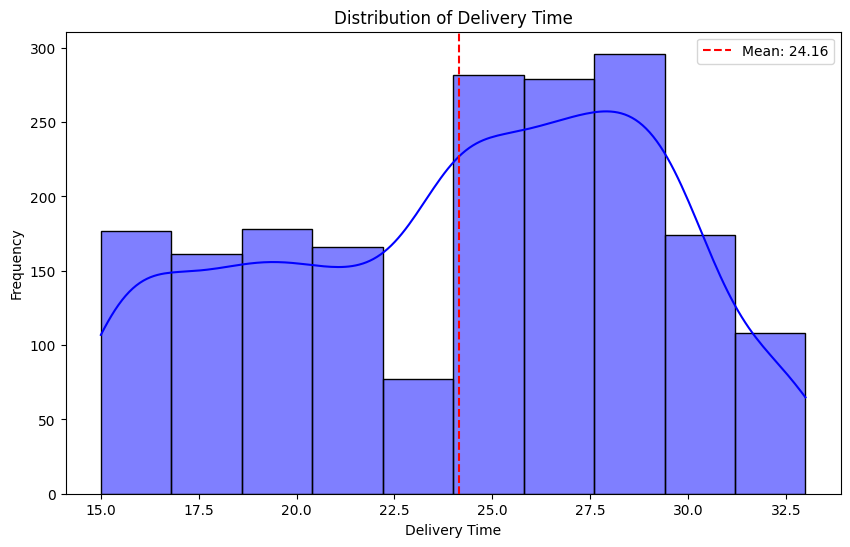

In [23]:
# We can see the mean order delivery time distribution to see the trends:
plt.figure(figsize=(10, 6))

# Lets create a distribution plot for 'delivery_time' with a kernel density estimate (kde), and we can use 10 bins for the histogram
sns.histplot(df['delivery_time'], kde=True, bins=10, color='blue')

# Calculate the mean of the 'delivery_time' column
mean_delivery_time = df['delivery_time'].mean()

# Add a vertical line to the plot at the mean delivery time
# Set the line color to red, style it as dashed, and add a label with the mean value
plt.axvline(mean_delivery_time, color='red', linestyle='--', label=f'Mean: {mean_delivery_time:.2f}')

# Set the plot features
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#### Observations: The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [24]:
# Counting the occurrences of each unique value in the 'customer_id' column
customer_id_counts = df['customer_id'].value_counts()

# Retrieve the top 3 most frequent 'customer_id' values
top_3_customers = customer_id_counts.head(3)

# Print the IDs and the number of orders for the top 3 customers
top_3_customers

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations: The ID's correspond to Customer IDs: 52832, 47440 and 83287


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Cuisine vs Cost of the order

In [25]:
#Let's remember the variables:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


<ipython-input-26-45bf8b576b70>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="day_of_the_week", y="delivery_time", palette="Set2")


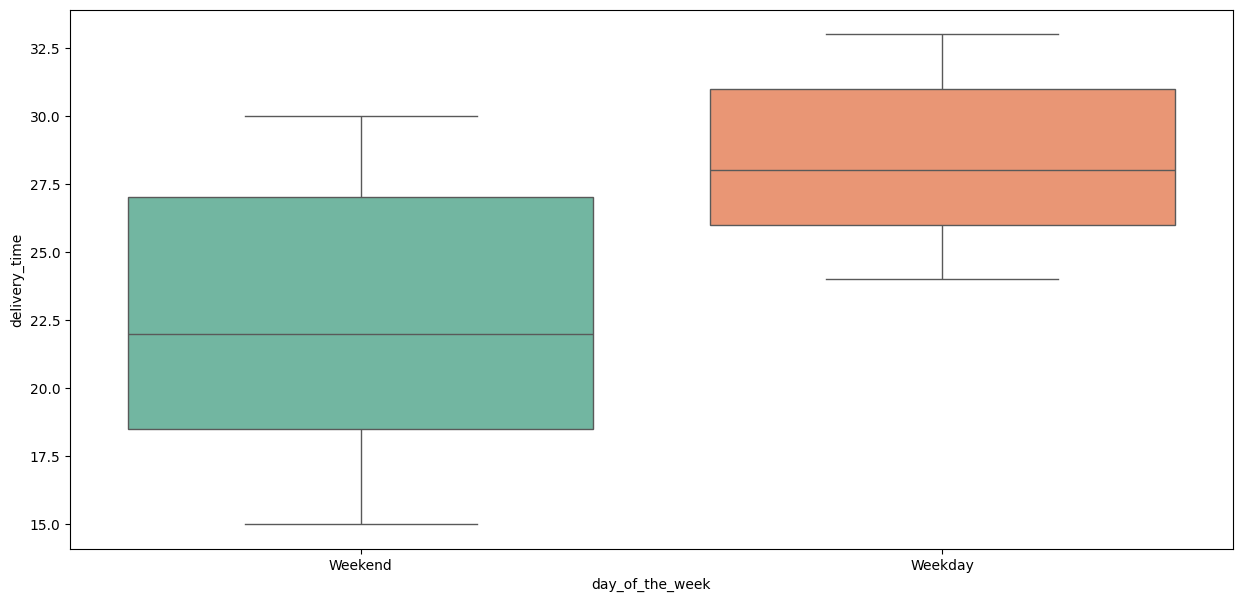

In [26]:
#We can start by looking the relationship between day of the week and delivery time
plt.figure(figsize=(15, 7))

# Let's create a box plot to visualize the distribution of 'delivery_time' for each 'day_of_the_week'. In this case, the x-axis represents 'day_of_the_week', and the y-axis represents 'delivery_time'
sns.boxplot(data=df, x="day_of_the_week", y="delivery_time", palette="Set2")
plt.show()


<ipython-input-27-4953d61d0187>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cuisine_type", y="cost_of_the_order", data=df, palette="Set2")


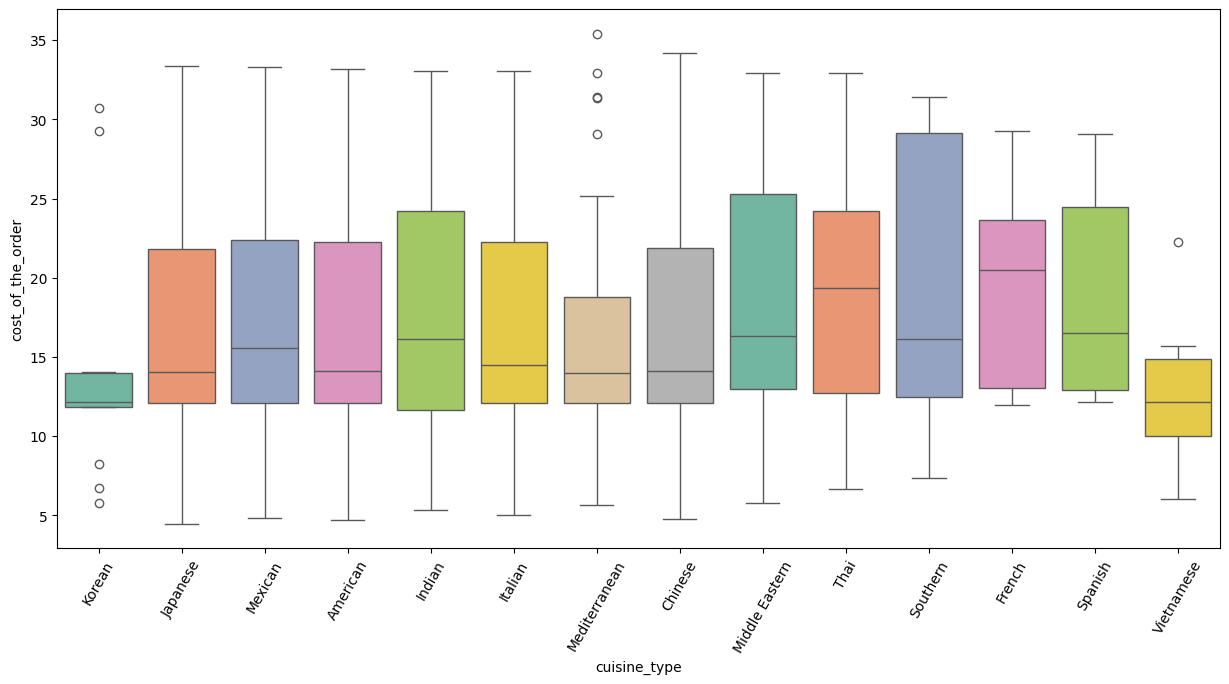

In [27]:
# Then, we could explore the relationship between cost of the order and cuisine type
plt.figure(figsize=(15, 7))

# Creating a box plot to explore the relationship between 'cost_of_the_order' and 'cuisine_type'
sns.boxplot(x="cuisine_type", y="cost_of_the_order", data=df, palette="Set2")
plt.xticks(rotation=60)
plt.show()


<ipython-input-28-20f0fb46e0d6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='food_preparation_time', y='cuisine_type', palette="Set2")


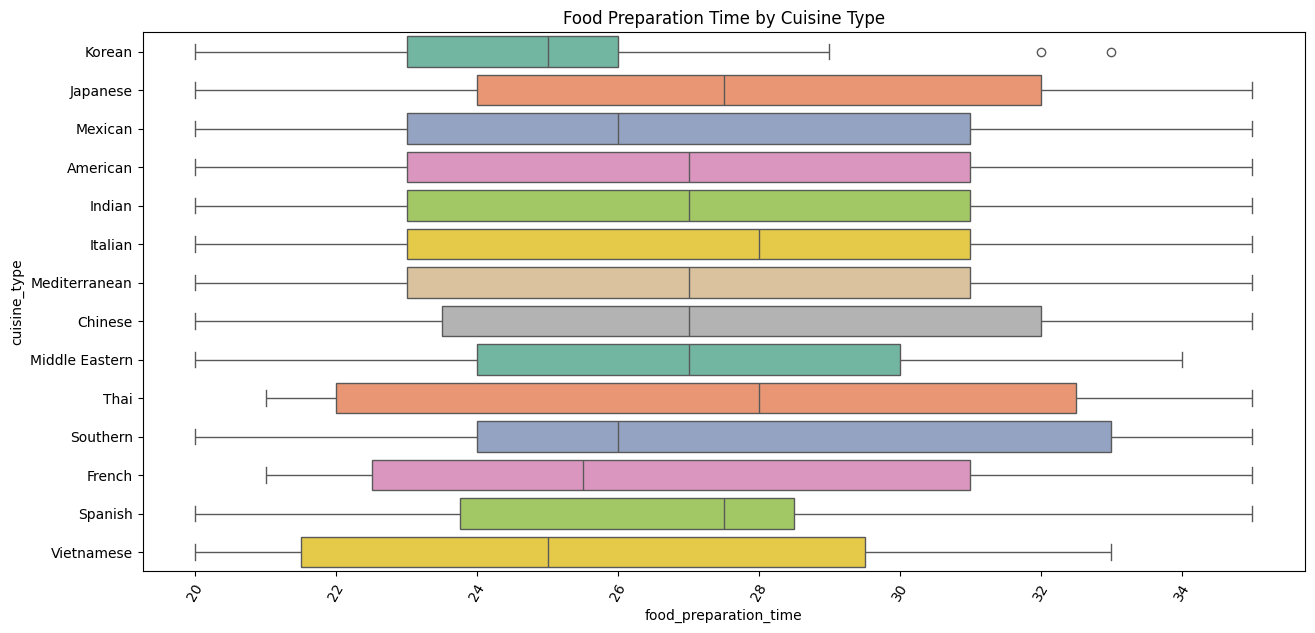

In [28]:
# Cuisine vs Food Preparation time
plt.figure(figsize=(15, 7))

# First, let's create a boxplot to visualize the distribution of 'food_preparation_time' across different 'cuisine_type'
sns.boxplot(data=df, x='food_preparation_time', y='cuisine_type', palette="Set2")
plt.xticks(rotation=60)
plt.title('Food Preparation Time by Cuisine Type')
plt.show()


Now, we could proceed by looking the relationships between

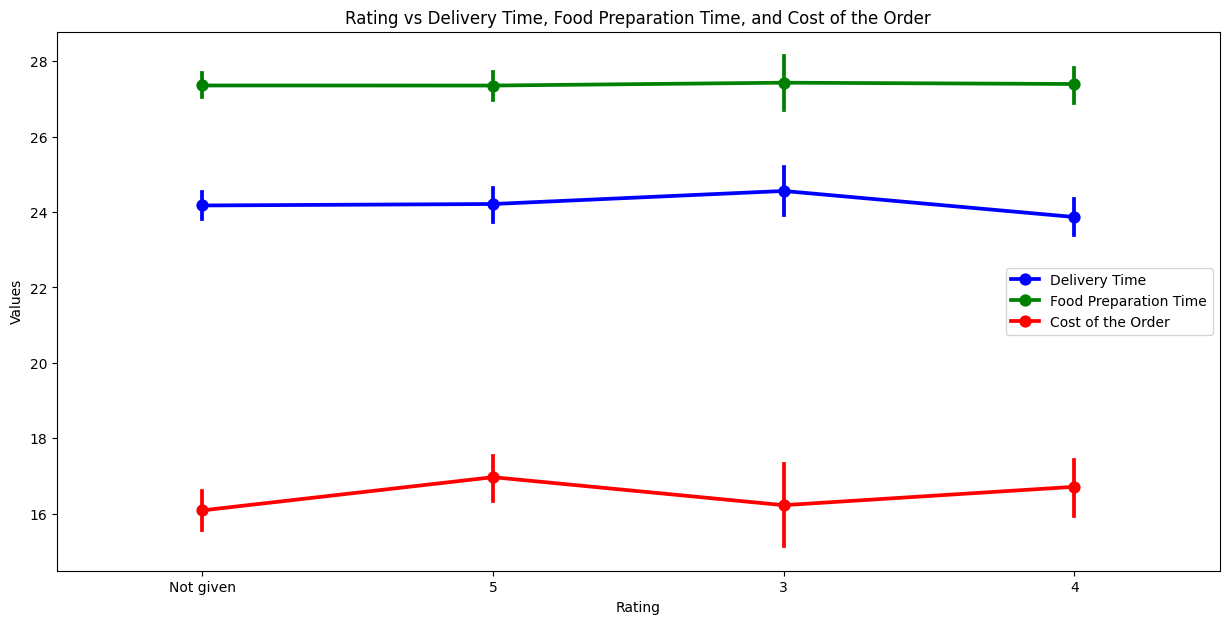

In [29]:
#Lets see the relationship between delivery time, food preparation time and cost_of_the_order with the variable rating in one unique plot:
plt.figure(figsize=(15, 7))

# Plot relationship between rating and delivery time:
sns.pointplot(x='rating', y='delivery_time', data=df, color='blue', label='Delivery Time')
# Plot relationship between rating and food preparation time:
sns.pointplot(x='rating', y='food_preparation_time', data=df, color='green', label='Food Preparation Time')
# Plot relationship between rating and cost of the order:
sns.pointplot(x='rating', y='cost_of_the_order', data=df, color='red', label='Cost of the Order')

# Plot features
plt.xlabel('Rating')
plt.ylabel('Values')
plt.title('Rating vs Delivery Time, Food Preparation Time, and Cost of the Order')
plt.legend()
plt.show()


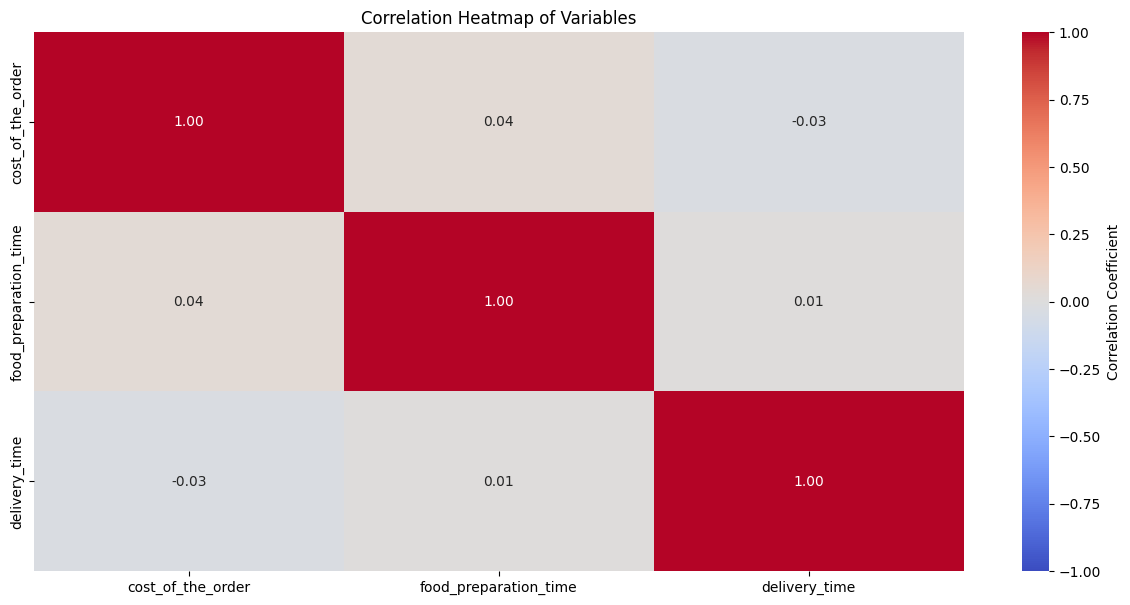

In [30]:
#Lets make a correlation map:
# Define the list of columns to explore
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))

# Create a heatmap to visualize the correlations between the variables
sns.heatmap(df[col_list].corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
#Plot
plt.title('Correlation Heatmap of Variables')
plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [31]:
# We have to filter the DataFrame to include only restaurants with a given rating
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert the 'rating' column from object type to integer type for numerical analysis
df_rated['rating'] = df_rated['rating'].astype('int')

# Group by 'restaurant_name' to count ratings and calculate the average rating for each restaurant
rating_summary = df_rated.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

# Filter restaurants with more than 50 ratings and an average rating greater than 4
promotional_restaurants = rating_summary[
    (rating_summary['rating_count'] > 50) & (rating_summary['average_rating'] > 4)
]

# Sorting in descending order by rating_count:
promotional_restaurants_sorted = promotional_restaurants.sort_values(by='rating_count', ascending=False)
print(promotional_restaurants_sorted)

               restaurant_name  rating_count  average_rating
117                Shake Shack           133        4.278195
132          The Meatball Shop            84        4.511905
17           Blue Ribbon Sushi            73        4.219178
16   Blue Ribbon Fried Chicken            64        4.328125


#### Observations: The top 5 of restaurants fulfilling the criteria to get the promotional offer are: 1. Shake Shack ; 2. The Meatball Shop; 3. Blue Ribbon Sushi and 4. Blue Ribbon Fried Chicken.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [32]:
# Define a function to compute revenue based on the cost of the order
def compute_rev(x):
    """
    Calculate the revenue based on the cost of the order:
    - If the cost is greater than 20, apply a 25% revenue rate.
    - If the cost is greater than 5 but not more than 20, apply a 15% revenue rate.
    - If the cost is 5 or less, the revenue is 0.

    Parameters:
    x (float): The cost of the order

    Returns:
    float: The calculated revenue
    """
    if x > 20:
        return x * 0.25  # Apply 25% revenue rate for orders costing more than 20
    elif x > 5:
        return x * 0.15  # Apply 15% revenue rate for orders costing between 5 and 20
    else:
        return x * 0     # No revenue for orders costing 5 or less

# Create a new column 'Revenue' in the DataFrame to store the computed revenue
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [33]:
# Now, to get the total revenue:

total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations: The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [34]:
# Calculate total delivery time and add a new column to the DataFrame df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the number of orders with a total delivery time greater than 60 minutes
orders_above_60_minutes = df[df['total_time'] > 60].shape[0]

# Calculate the total number of orders
total_orders = df.shape[0]

# Calculate the percentage of orders with a total delivery time greater than 60 minutes
percentage_above_60 = (orders_above_60_minutes / total_orders) * 100

# Print the percentage
print(f"Percentage of orders that take more than 60 minutes: {percentage_above_60:.2f}%")

Percentage of orders that take more than 60 minutes: 10.54%


#### Observations: It can be seen that approximately only 10.5% of orders take a delay with 60+ minutes.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [35]:
# Calculate the mean delivery time for weekdays
mean_delivery_time_weekdays = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

# Calculate the mean delivery time for weekends
mean_delivery_time_weekends = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# Print the mean delivery times for weekdays and weekends
print(f'The mean delivery time on weekdays is around {round(mean_delivery_time_weekdays)} minutes.')
print(f'The mean delivery time on weekends is around {round(mean_delivery_time_weekends)} minutes.')


The mean delivery time on weekdays is around 28 minutes.
The mean delivery time on weekends is around 22 minutes.


#### Observations: We can see that the variation is around 6 minutes between weekdays and weekends


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  We can observe that in the cuisine type, the American leads in first place. Also, it can be seen that Vietnamese food is in the last place (less-favorite).
* We can observe that the Weekends are the days with higher numbers of counts, meaning that users trend to visit restaurants on weekends.
* It can be seen that most of the clients do not provide rating.
* It was found that the most popular restaurant is Shake Shack, which has the highest rating count and the highest average rating.
* Around 71% of the orders are $20 or below.
* The mean delivery time is around 24.2 minutes.
* The customer No. 52832 is the most frequent.
* The delivery time for weekdays has more delay, meaning that delivery time for weekends is lower.
* The southern cuisine has the most variable cost of the orders.
* The french cuisine is the most expensive on average.
* Korean and Vietnamese foods are the most faster, taking into account that they have the lower food preparation time.
* The food preparation time has the most ratings.
* The cost of the order and the delivery time has an inverse correlation, meaning that if one quantity grows, the other decreases.
* The restaurant Hangawi has the highest revenue per order, around 7.69.
* The net revenue of the company is around 6166.3 dollars
* Around 10.5% of the orders take more than 60 minutes to depart.
* The difference between mean delivery time on weekdays and weekends is around 6 minutes, which could mean that the delivery time is more effective in weekends. This could mean that there are more mechanisms to optimize the delivery according to the demand: Higher number of clients, more effective delivery time.

### Recommendations:

*  If we want to make a diverse food offer, we could optimize the Vietnamese food, making it more common for users. Maybe, we could use an advertising campagin promoting this kind of food. Taking into account that the Vietnamese food is one of the most faster cuisines of the offer. These, could let to gain some kind of additional revenue to the company.
* We should implement a script to ensure the most quantity of rating through an automatized system in our orders, so it would be useful to know what does the user think about our service.
* We could think about implementing a on-demand system to make the difference of delivery time between weekdays and weekends lower, as the delivery time is around 24 minutes.